In [1]:
!pip install transformers==4.25.1
!pip install pytorch-lightning==1.6.4
!pip install timm==0.5.4
!pip install gradio
!pip install donut-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.9/93.9 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 74.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 90.8 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.19.1
    Uninstalling tokenizers-0.19.1:
      Successfully uninstalled tokenizers-0.19.1
  Attempting uninstall: transformers
    Found existing installation: transformers 4.44.2
    Uninstalling transformers-4.44.2:
      Successfully uninstalled transformers-4.44.2
Requested pytorch-lightning==1.6.4 from https://files.pythonhosted.org/packages/79/f9/37f4fd369652a80a1def12ce5af44be93ee7b66dd4de464d37141e29ed58/pytorch_lightning-1.6.4-py3-none-any.whl has invalid metadata: .* suffix can only be used with `==` or `!=` operators
    torch (>=1.8.*)
           ~~~~~~^
Please use pip<24.1 if you need to use this version.
ERROR: Could not find a version that satisfies the requirem

In [2]:
import argparse
import gradio as gr
import torch
from PIL import Image

from donut import DonutModel

In [3]:
def process_vqa(input_img, question):
    global pretrained_model, task_prompt, task_name
    user_prompt = task_prompt.replace("{user_input}", question)
    output = pretrained_model.inference(input_img, prompt=user_prompt)["predictions"][0]
    return output

In [4]:
pretrained_model = DonutModel.from_pretrained("naver-clova-ix/donut-base-finetuned-docvqa")

if torch.cuda.is_available():
    pretrained_model.half()
    device = torch.device("cuda")
    pretrained_model.to(device)
else:
    pretrained_model.encoder.to(torch.bfloat16)

pretrained_model.eval()


/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/405 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.01G [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/modeling_utils.py:399: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(checkpoint_file, map_location="cp

sentencepiece.bpe.model:   0%|          | 0.00/1.30M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/478 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/535 [00:00<?, ?B/s]

DonutModel(
  (encoder): SwinEncoder(
    (model): SwinTransformer(
      (patch_embed): PatchEmbed(
        (proj): Conv2d(3, 128, kernel_size=(4, 4), stride=(4, 4))
        (norm): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
      )
      (pos_drop): Dropout(p=0.0, inplace=False)
      (layers): Sequential(
        (0): BasicLayer(
          dim=128, input_resolution=(640, 480), depth=2
          (blocks): ModuleList(
            (0): SwinTransformerBlock(
              (norm1): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
              (attn): WindowAttention(
                (qkv): Linear(in_features=128, out_features=384, bias=True)
                (attn_drop): Dropout(p=0.0, inplace=False)
                (proj): Linear(in_features=128, out_features=128, bias=True)
                (proj_drop): Dropout(p=0.0, inplace=False)
                (softmax): Softmax(dim=-1)
              )
              (drop_path): Identity()
              (norm2): LayerNorm((128,), ep

In [5]:
from PIL import Image
import requests
def get_image(url):
  return Image.open(requests.get(url, stream=True).raw).convert("RGB")

In [6]:
task_prompt = "<s_docvqa><s_question>{user_input}</s_question><s_answer>"

In [9]:
url = "https://github.com/rmadiraju/llm_experiments/blob/doc-processing/data/Bookout-1.png?raw=true"
image = get_image(url)

question = "What is the vehicle vin?"
print(f"{question} \n {process_vqa(image, question)}")

question = "What is the year of the vehicle?"
print(f"{question} \n {process_vqa(image, question)}")

question = "What is the odometer reading?"
print(f"{question} \n {process_vqa(image, question)}")

question = "What is the vehicle value?"
process_vqa(image, question)

What is the vehicle vin? 
 {'question': 'What is the vehicle vin?', 'answer': 'odometer'}
What is the year of the vehicle? 
 {'question': 'What is the year of the vehicle?', 'answer': '1399p'}
What is the odometer reading? 
 {'question': 'What is the odometer reading?', 'answer': '66,000'}


{'question': 'What is the vehicle value?', 'answer': 'bookout'}

In [ ]:
url = "https://github.com/rmadiraju/llm_experiments/blob/doc-processing/Paystub-1.jpeg?raw=true"
image = get_image(url)

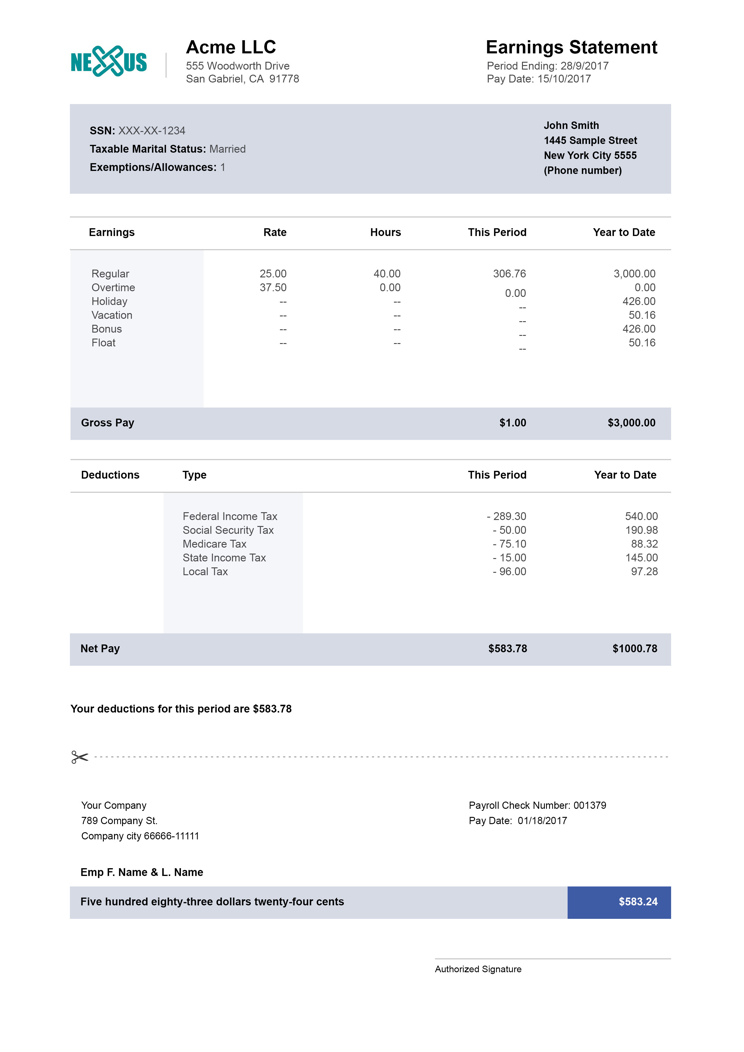

In [ ]:
# Display image if required
width, height = image.size
display(image.resize((int(0.3*width), (int(0.3*height)))))

In [ ]:
question = "What is the net pay?"
process_vqa(image, question)

{'question': 'What is the net pay?', 'answer': '$583.78'}

In [ ]:
question = "What is the customer name?"
process_vqa(image, question)

{'question': 'What is the customer name?', 'answer': '$583.78'}

In [ ]:
question = "What is the company name?"
process_vqa(image, question)

{'question': 'What is the company name?', 'answer': 'r. name & l. name'}

In [ ]:
question = "What is the pay date?"
process_vqa(image, question)

{'question': 'What is the pay date?', 'answer': '15/10/2017'}

In [ ]:
url = "https://github.com/rmadiraju/llm_experiments/blob/doc-processing/Sample-buyers-order.gif?raw=true"
image = get_image(url)

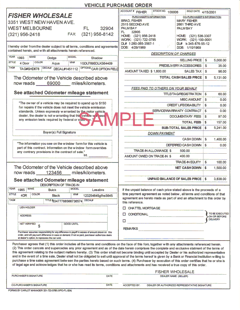

In [ ]:
# Display image if required
width, height = image.size
display(image.resize((int(0.3*width), (int(0.3*height)))))

In [ ]:
question = "What is the tradein vehicle?"
process_vqa(image, question)

{'question': 'What is the tradein vehicle?', 'answer': '$100.00'}

In [ ]:
question = "What is the odometer reading?"
process_vqa(image, question)

{'question': 'What is the odometer reading?', 'answer': '69000'}